In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from demo import Spotify, Recommender
from demo.lib import DB
from IPython.display import clear_output

In [2]:
db = DB()

search_sp = Spotify()
search_sp.search()

mailbox_id = db.save_mailbox(search_sp.sel_tracks)
print("우체통 '{}'이 등록되었습니다.".format(mailbox_id))

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit
우체통 '6290242fbb6c3c38842d078c'이 등록되었습니다.


# Demo1. 편지작성

## 1. 객체 초기화

In [101]:
recommender = Recommender(mailbox_id)

## 2. 데이터 병합

In [102]:
print("총 {}개의 사용자 음악".format(recommender.user['tracks'].index.size))
recommender.user['tracks'].head()

총 5개의 사용자 음악


,trackId,trackName,artistIds,artistNames,image
0,5quFr5s5PXYfUX5jV2EBZ1,GANADARA (Feat. IU),4XDi67ZENZcbfKnvMnTYsI,Jay Park,https://i.scdn.co/image/ab67616d0000b2738c0def...
1,1NVWjRzPireoOPJIGeHTIE,Maestro,3hvinNZRzTLoREmqFiKr1b,CHANGMO,https://i.scdn.co/image/ab67616d0000b273ee2306...
2,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,https://i.scdn.co/image/ab67616d0000b273e844e3...
3,3UPjb91Fwm7u2tAm92Bk0p,why break up?,02SENF0XVfxRTZrniEV2aF,Sin Ye Young,https://i.scdn.co/image/ab67616d0000b273495623...
4,47CcHKISaUPsK4QkO9ERFc,Phonecert,6zn0ihyAApAYV51zpXxdEp,10cm,https://i.scdn.co/image/ab67616d0000b273752a6a...


In [103]:
print("총 {}개의 추천 음악".format(recommender.reco['tracks'].index.size))
recommender.reco['tracks'].head()

총 485개의 추천 음악


,trackId,trackName,artistIds,artistNames,image,seedId
0,1mKXFLRA179hdOWQBwUk9e,Just Give Me a Reason (feat. Nate Ruess),1KCSPY1glIKqW2TotWuXOR,P!nk,https://i.scdn.co/image/ab67616d0000b2739d0f0d...,5quFr5s5PXYfUX5jV2EBZ1
1,5SoN5GIDUG1aNQTuNqsVDu,Just the two of us,3hvinNZRzTLoREmqFiKr1b,CHANGMO,https://i.scdn.co/image/ab67616d0000b273483eb4...,5quFr5s5PXYfUX5jV2EBZ1
2,72jbDTw1piOOj770jWNeaG,Paris,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,https://i.scdn.co/image/ab67616d0000b2730c13d3...,5quFr5s5PXYfUX5jV2EBZ1
3,6Hgh47WXVKtXN5zGOu0hjI,OTW,"6LuN9FCkKOj5PcnpouEgny,4IVAbR2w4JJNJDDRFP3E83,...","Khalid,6LACK,Ty Dolla $ign",https://i.scdn.co/image/ab67616d0000b2739766f7...,5quFr5s5PXYfUX5jV2EBZ1
4,7e44z4wOjkllaD8eulUeMd,Truffle Butter,0hCNtLu0JehylgoiP8L4Gh,Nicki Minaj,https://i.scdn.co/image/ab67616d0000b2731e0a93...,5quFr5s5PXYfUX5jV2EBZ1


In [104]:
recommender.merge()
print("총 {}개의 병합 음악".format(recommender.merged['tracks'].index.size))
recommender.merged['tracks'].head()

총 490개의 병합 음악


,trackId,trackName,artistIds,artistNames,image,seedId
0,5quFr5s5PXYfUX5jV2EBZ1,GANADARA (Feat. IU),4XDi67ZENZcbfKnvMnTYsI,Jay Park,https://i.scdn.co/image/ab67616d0000b2738c0def...,NaN
1,1NVWjRzPireoOPJIGeHTIE,Maestro,3hvinNZRzTLoREmqFiKr1b,CHANGMO,https://i.scdn.co/image/ab67616d0000b273ee2306...,NaN
2,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,https://i.scdn.co/image/ab67616d0000b273e844e3...,NaN
3,3UPjb91Fwm7u2tAm92Bk0p,why break up?,02SENF0XVfxRTZrniEV2aF,Sin Ye Young,https://i.scdn.co/image/ab67616d0000b273495623...,NaN
4,47CcHKISaUPsK4QkO9ERFc,Phonecert,6zn0ihyAApAYV51zpXxdEp,10cm,https://i.scdn.co/image/ab67616d0000b273752a6a...,NaN


## 3. 데이터 전처리

In [105]:
recommender.data_preprocessing()

In [106]:
recommender.features['default'][:5, 1:]

array([[0.196, 0.492, 0.615, 0.0, 2, 0.0772, -6.663, 0.244, 90.081,
        0.458],
       [0.558, 0.89, 0.596, 0.0, 3, 0.0714, -4.177, 0.0962, 113.916,
        0.823],
       [0.989, 0.632, 0.0378, 0.935, 5, 0.112, -20.596, 0.0583, 121.361,
        0.357],
       [0.808, 0.554, 0.526, 0.0, 7, 0.074, -5.21, 0.0394, 129.845, 0.23],
       [0.391, 0.858, 0.481, 0.0, 9, 0.128, -3.649, 0.104, 107.96, 0.773]],
      dtype=object)

In [107]:
recommender.features['norm'][:5]

array([[0.19687030711920697, 0.37001375515818435, 0.6332227835807789,
        0.0, 0.18181818181818182, 0.07020080321285141,
        0.8188817815683488, 0.49381327334083247, 0.21776315789473685,
        0.45244021209825785],
       [0.5607413319287778, 0.9174690508940854, 0.6135924536879191, 0.0,
        0.2727272727272727, 0.06088353413654619, 0.9170417752507305,
        0.16130483689538808, 0.3761562998405103, 0.8474191104858781],
       [0.9939689885390679, 0.562585969738652, 0.036874024940850715,
        0.9521384928716905, 0.45454545454545453, 0.12610441767068273,
        0.26873568664613445, 0.07604049493813274, 0.42563131313131314,
        0.3431446813115464],
       [0.8120334761342826, 0.45529573590096295, 0.5412701856615938, 0.0,
        0.6363636363636364, 0.0650602409638554, 0.8762536523730553,
        0.03352080989876265, 0.48201089845826683, 0.2057136673520182],
       [0.39287817959950067, 0.8734525447042641, 0.49477729907324175,
        0.0, 0.8181818181818182, 0.151807

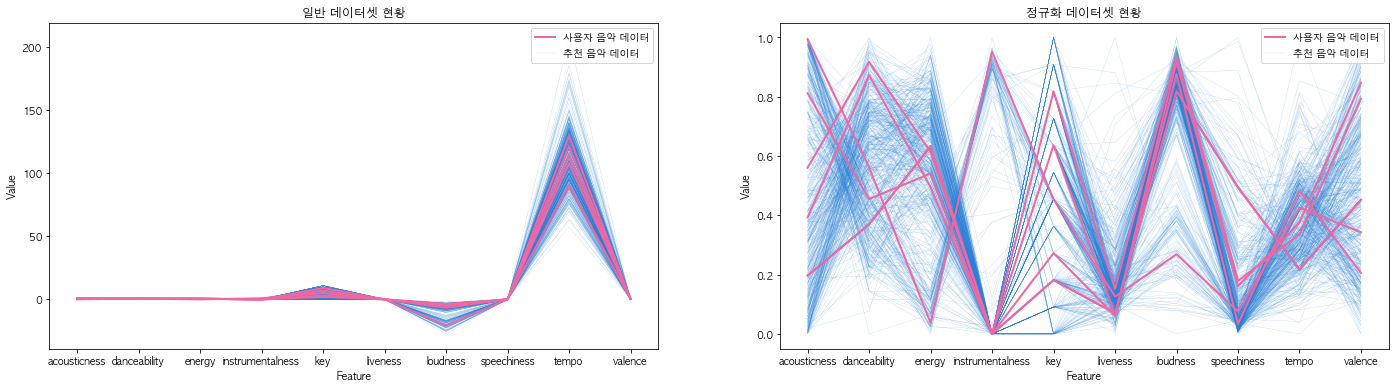

In [108]:
recommender.draw_dataset()

## 4. KMeans Run

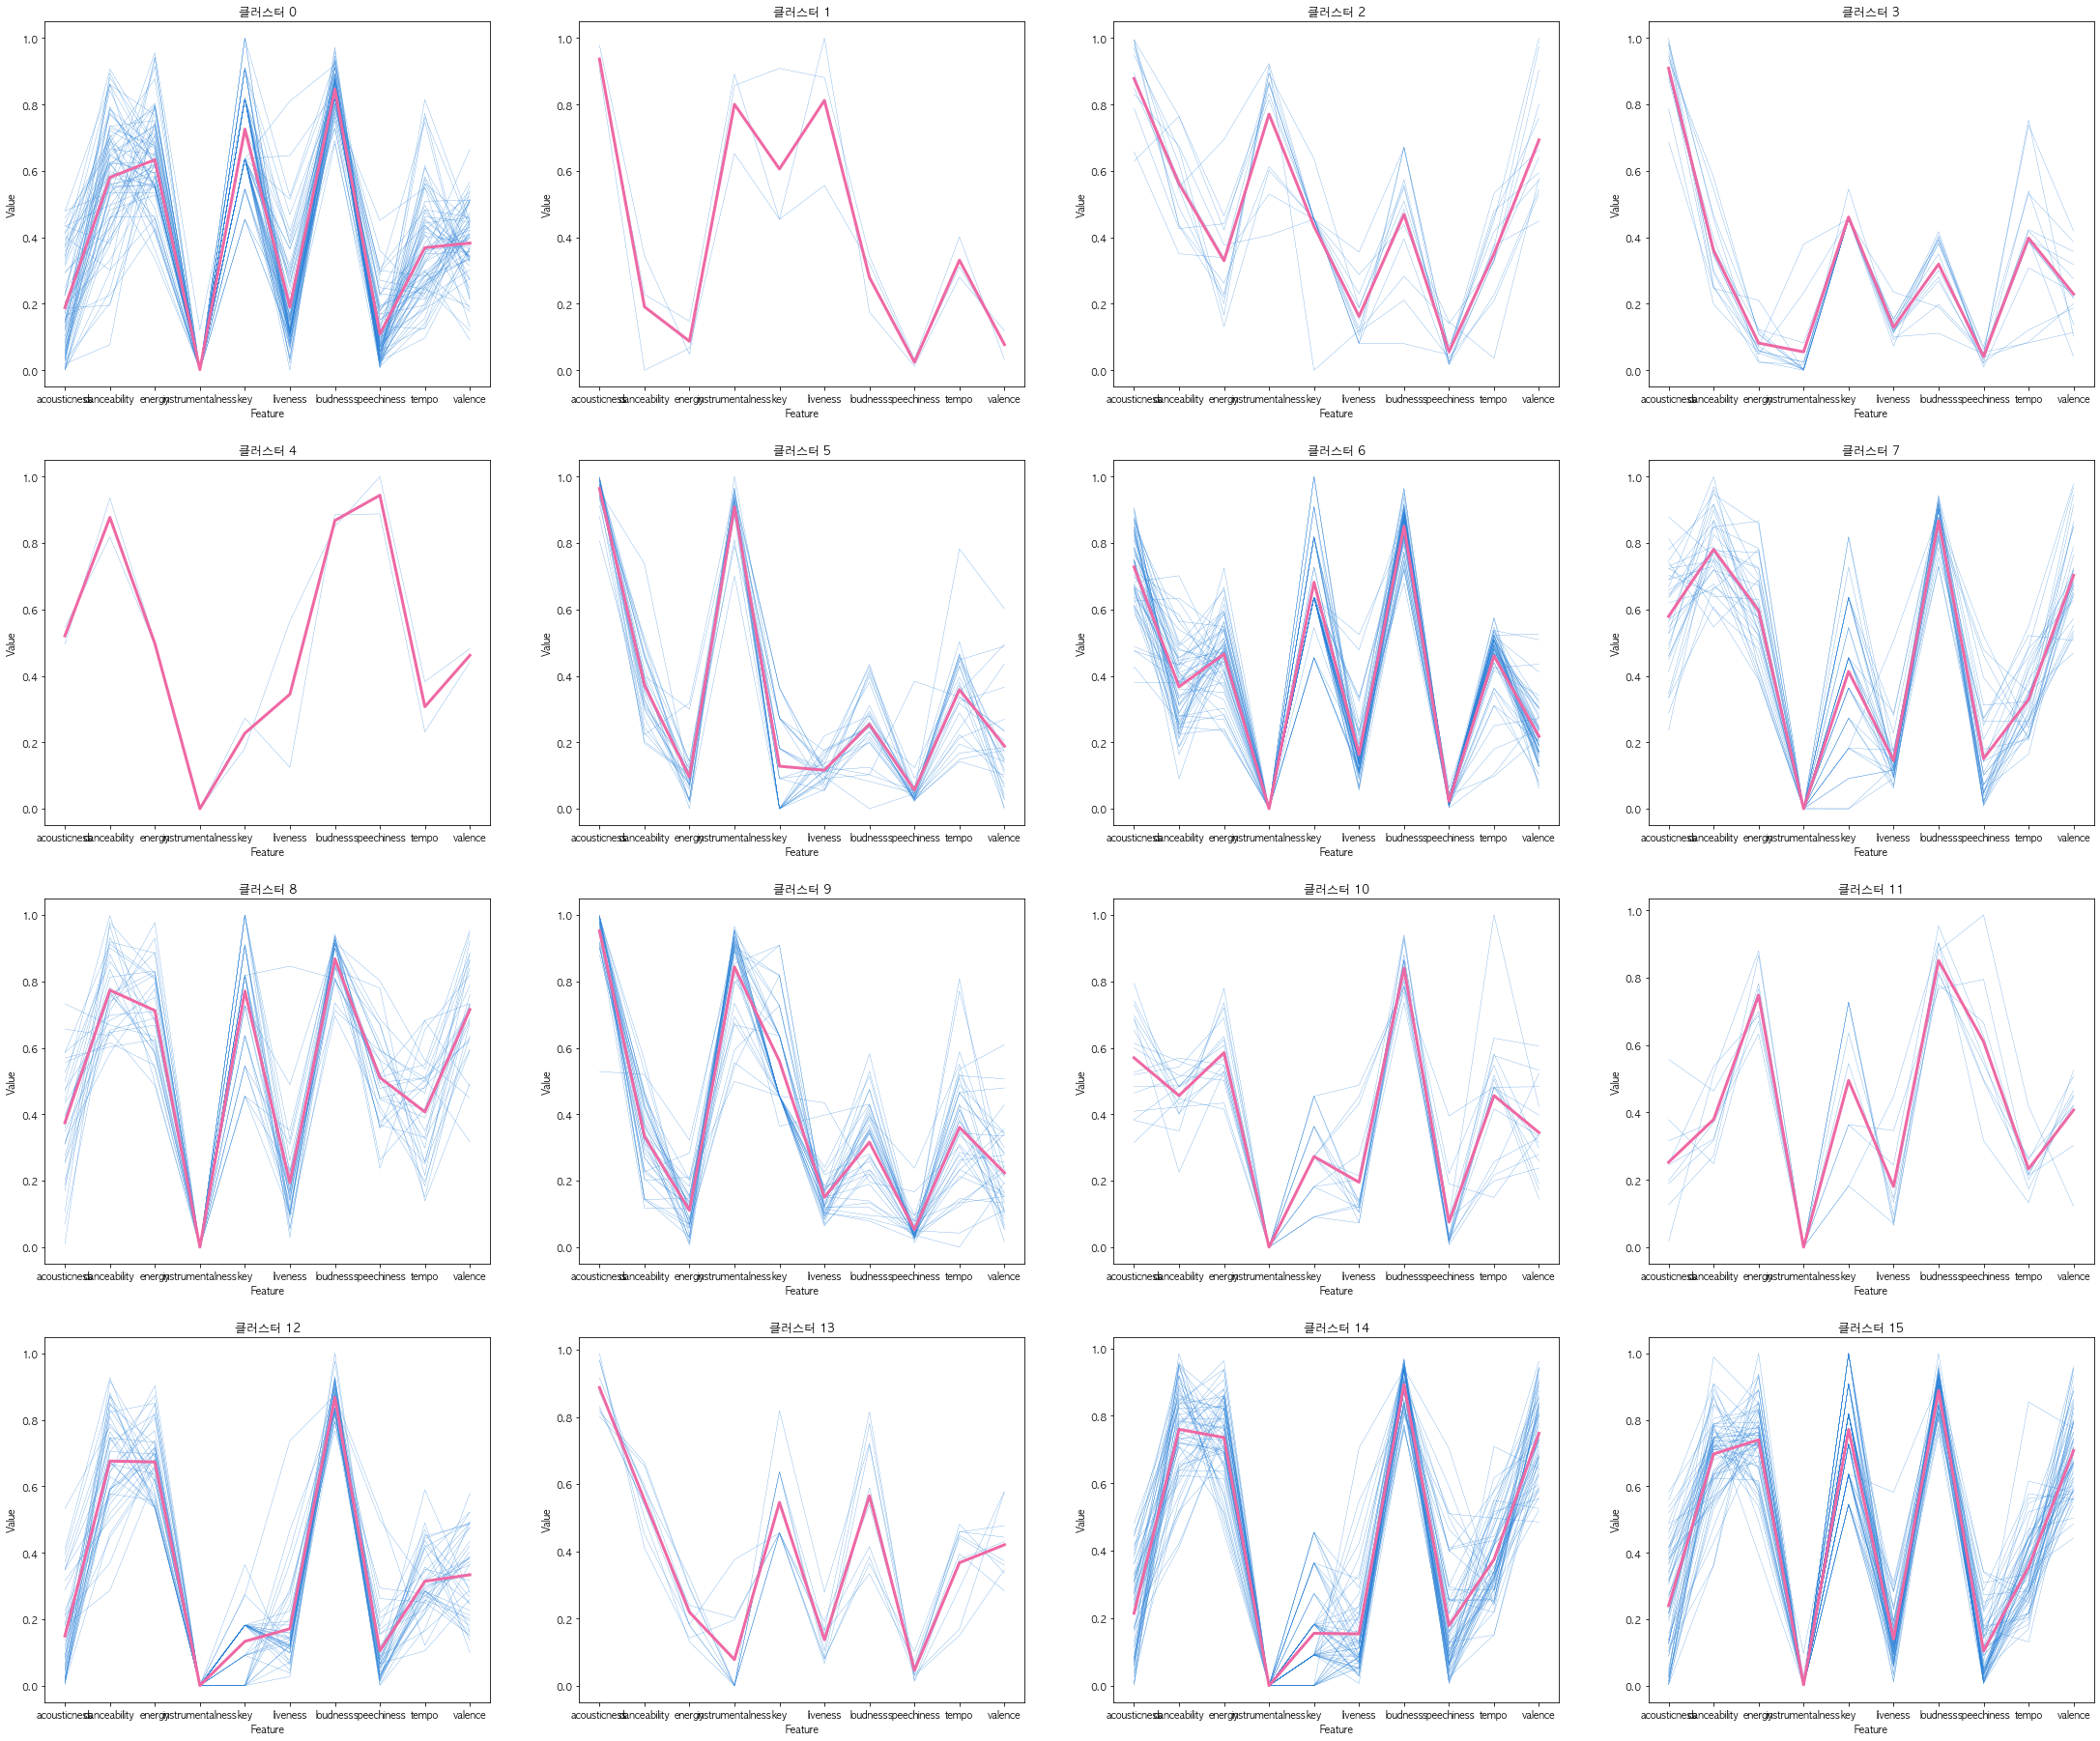

In [251]:
recommender.run()

clear_output(wait=True)
recommender.draw_cluster()

## 5. Recommend Cluster Parsing

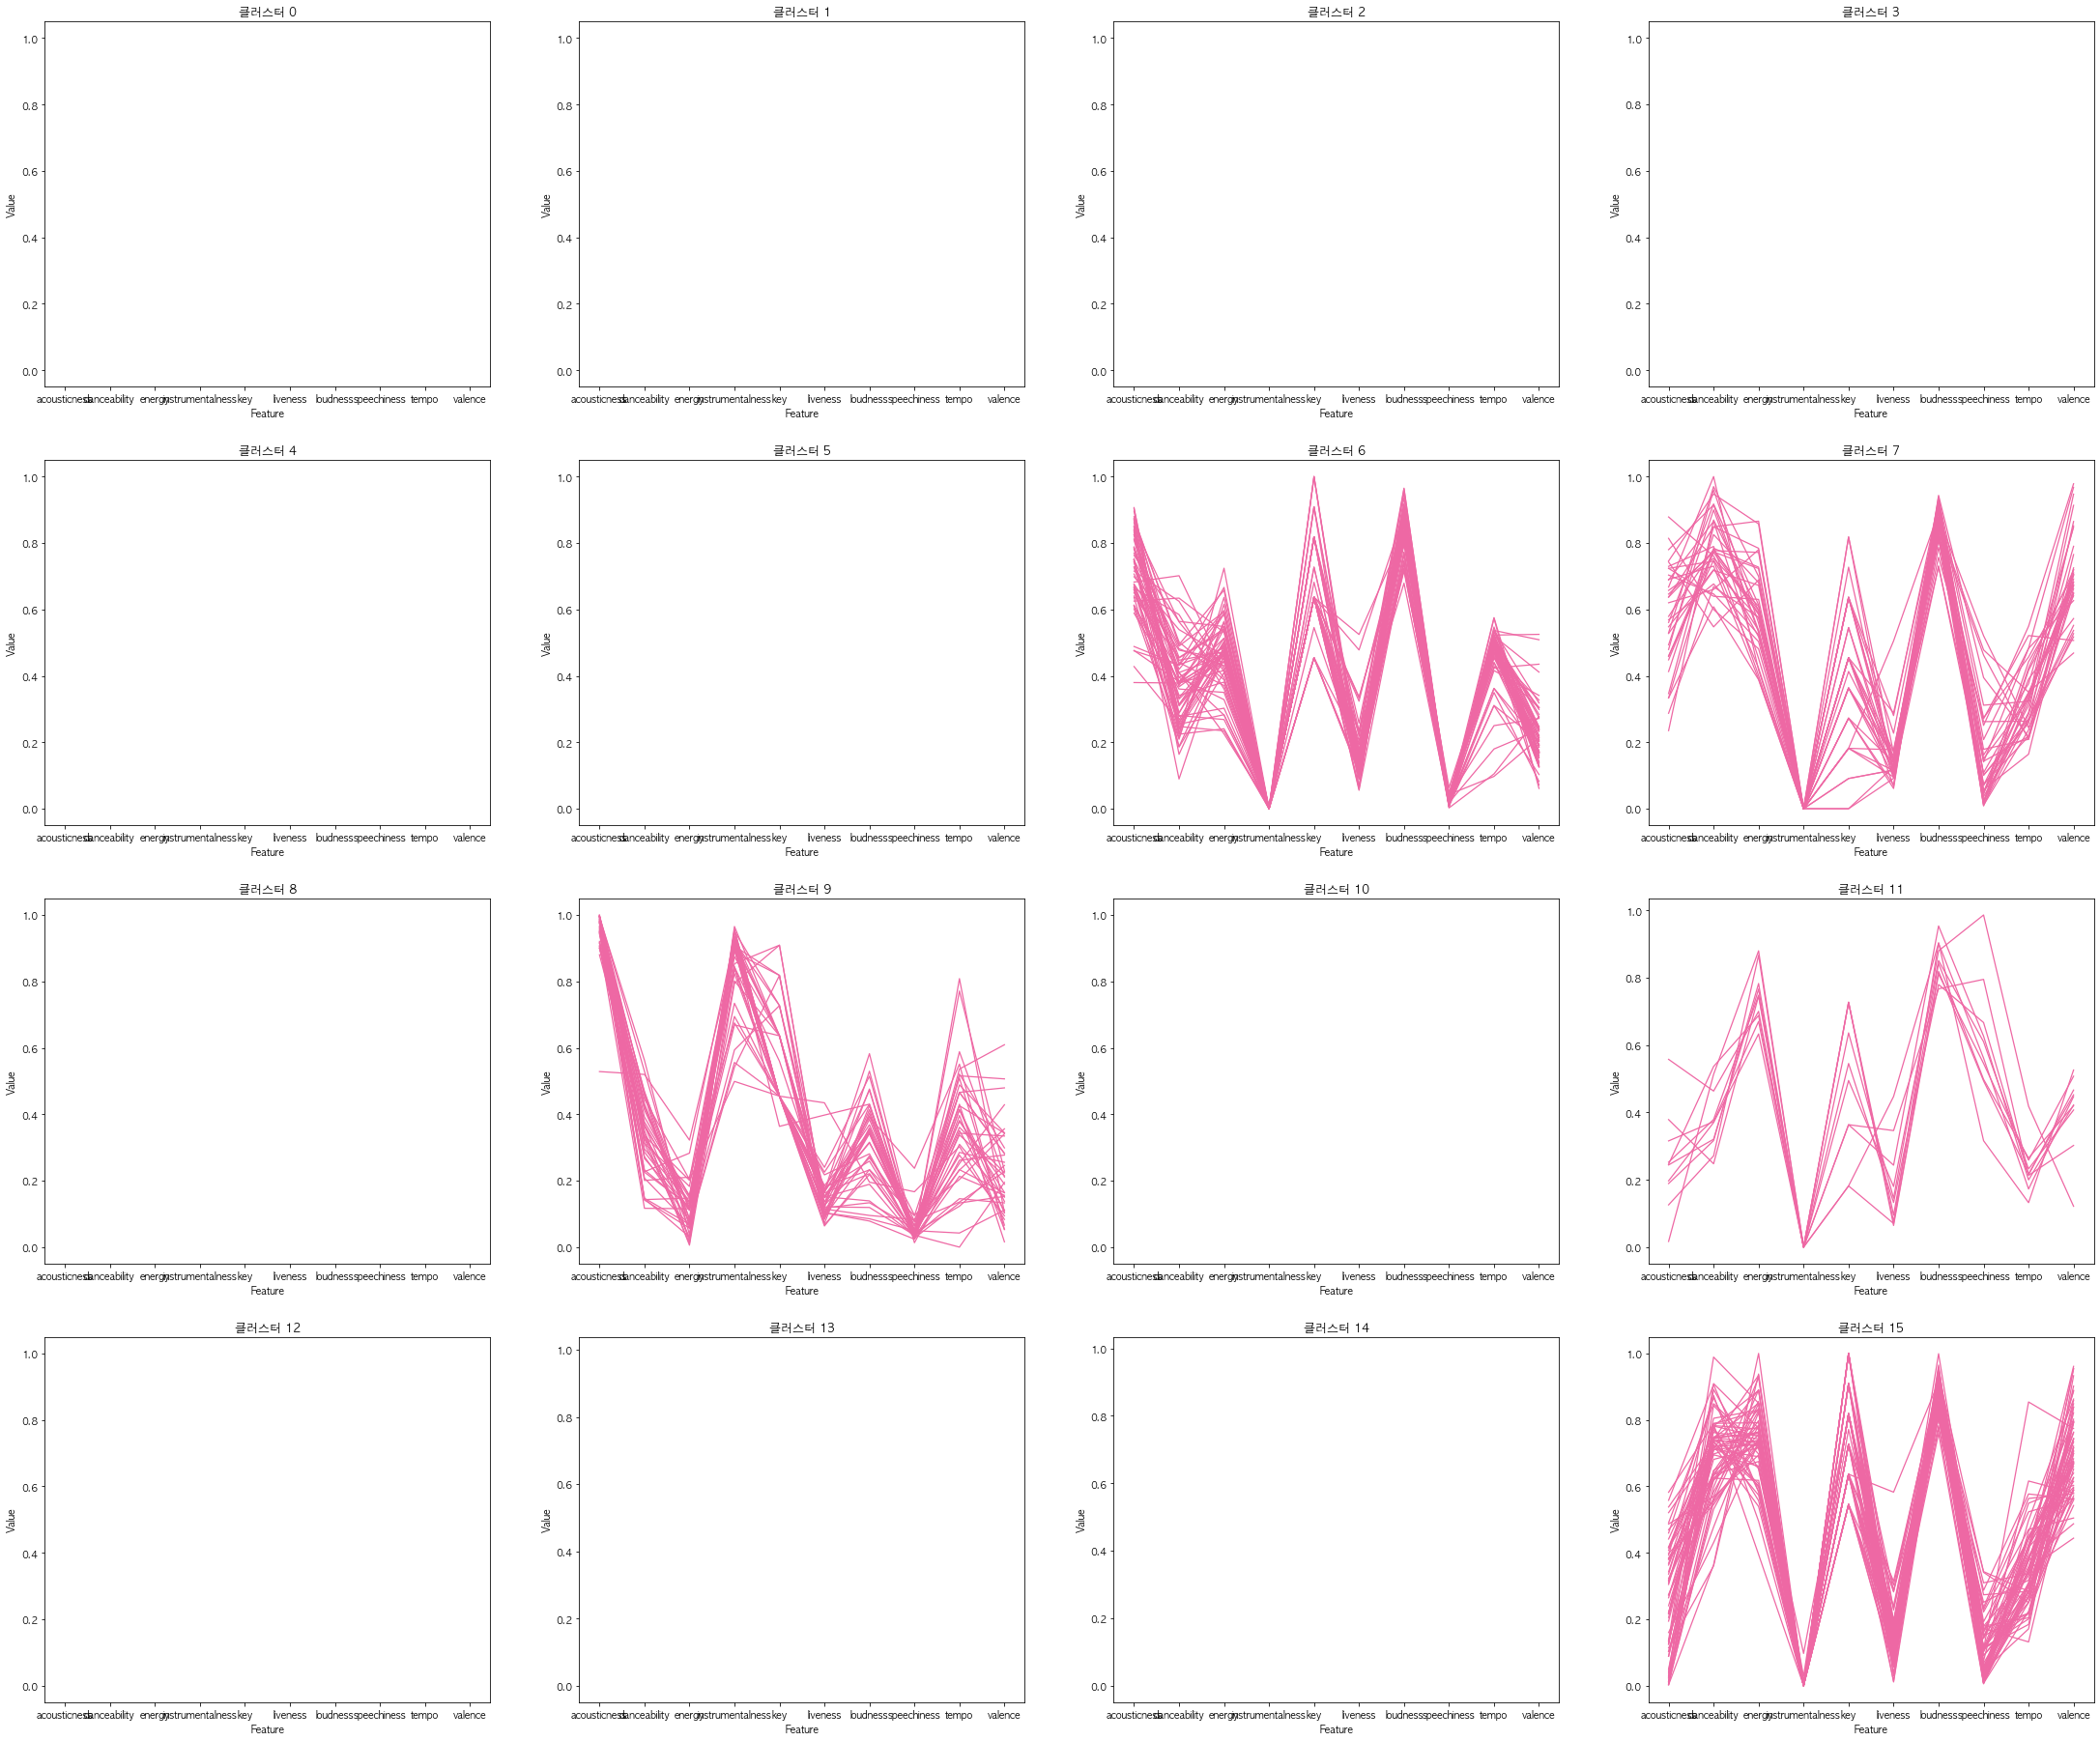

In [252]:
recommender.parse_reco_cluster()

recommender.draw_cluster()

In [253]:
print("총 {}개의 추천음악이 선정 되었습니다.".format(recommender.reco_['tracks']['trackId'].size))
recommender.reco_['tracks'].head()

총 197개의 추천음악이 선정 되었습니다.


,trackId,trackName,artistIds,artistNames,image,seedId
0,6dQ4nj3aDaw7WWlI7Rbj34,AURA (feat. pH-1) (Prod. GXXD),0lgENJQUkqkDbpsTYEayOr,JUNNY,https://i.scdn.co/image/ab67616d0000b273d4c1ae...,5quFr5s5PXYfUX5jV2EBZ1
1,2PcJoVkfjcbvoqBxV1Nj7y,All I Wanna Do,4XDi67ZENZcbfKnvMnTYsI,Jay Park,https://i.scdn.co/image/ab67616d0000b27382ecc5...,5quFr5s5PXYfUX5jV2EBZ1
2,44f1TNdoQUgf3PUYraCTsH,BLACK,30b9WulBM8sFuBo17nNq9c,G-DRAGON,https://i.scdn.co/image/ab67616d0000b2738993ce...,5quFr5s5PXYfUX5jV2EBZ1
3,1SPDWTBH7qcjbZ8zMRXlQ9,Let Me Know,5YPCpDIPOY4WqY9Bqdw4Uc,Jimmy Brown,https://i.scdn.co/image/ab67616d0000b27322d4c2...,5quFr5s5PXYfUX5jV2EBZ1
4,1pz24zu5H9A0S1a2NKT4F0,SoulMate (feat. IU),4XpUIb8uuNlIWVKmgKZXC0,ZICO,https://i.scdn.co/image/ab67616d0000b2737ac73c...,5quFr5s5PXYfUX5jV2EBZ1


## 6. 수량 조정 작업

수량 조정 전
음악 간 표준편차 - 17


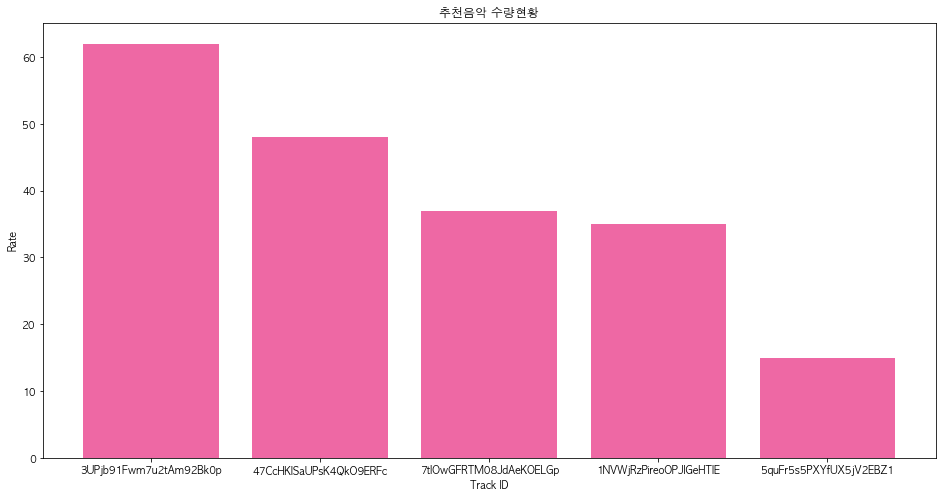

In [257]:
print("수량 조정 전")
recommender.draw_rate()

수량 조정 후
음악 간 표준편차 - 3


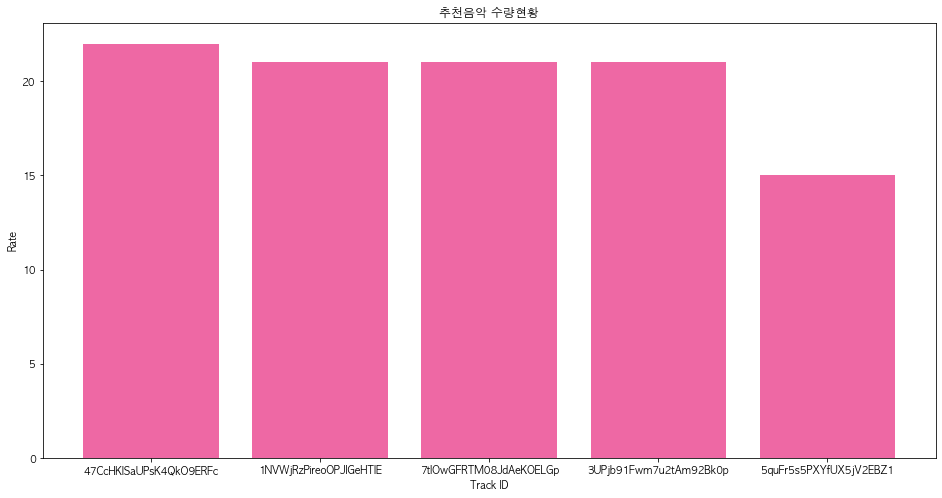

In [258]:
recommender.adjust_rate()

print("수량 조정 후")
recommender.draw_rate()